# Análise Exploratoria de Dados

## Importando Base de Dados

In [282]:
import pandas as pd

In [283]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduzindo Base de Dados

In [284]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [285]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjeta',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size': 'total_de_pessoas'
}

In [286]:
gorjetas = dados.rename(columns=renomear)

In [287]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [288]:
gorjetas['sobremesa'].unique()

array(['No', 'Yes'], dtype=object)

In [289]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [290]:
gorjetas['sobremesa'] = gorjetas['sobremesa'].map(sim_nao)

In [291]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,Não,Sat,Dinner,3
240,27.18,2.00,Sim,Sat,Dinner,2
241,22.67,2.00,Sim,Sat,Dinner,2
242,17.82,1.75,Não,Sat,Dinner,2


In [292]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [293]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta-feira',
    'Fri':'Sexta-feira'
}

In [294]:
gorjetas['dia_da_semana'] = gorjetas['dia_da_semana'].map(dias)

In [295]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [296]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [297]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [298]:
gorjetas['hora_do_dia'] = gorjetas['hora_do_dia'].map(hora)

In [299]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Importando Seaborn

In [300]:
import seaborn as sns

In [301]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\walas\anaconda3\lib\site-packages
Requires: pandas, matplotlib, scipy, numpy
Required-by: 


## Elaboração de Hiposteses

In [302]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

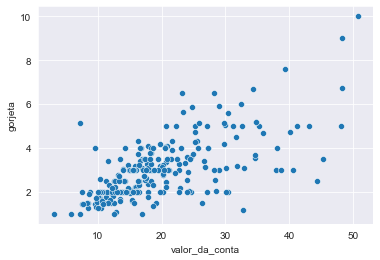

In [303]:
sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor das gorjetas aumenta de acordo com o aumento do valor da conta**

In [304]:
len(gorjetas)

244

In [305]:
gorjetas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor_da_conta    244 non-null    float64
 1   gorjeta           244 non-null    float64
 2   sobremesa         244 non-null    object 
 3   dia_da_semana     244 non-null    object 
 4   hora_do_dia       244 non-null    object 
 5   total_de_pessoas  244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


## Criando o campo de percentual

In [306]:
gorjetas['percentual'] = (gorjetas.gorjeta / gorjetas.valor_da_conta) * 100

In [307]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,percentual
0,16.99,1.01,Não,Domingo,Jantar,2,5.944673
1,10.34,1.66,Não,Domingo,Jantar,3,16.054159
2,21.01,3.50,Não,Domingo,Jantar,3,16.658734
3,23.68,3.31,Não,Domingo,Jantar,2,13.978041
4,24.59,3.61,Não,Domingo,Jantar,4,14.680765
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.392697
240,27.18,2.00,Sim,Sábado,Jantar,2,7.358352
241,22.67,2.00,Sim,Sábado,Jantar,2,8.822232
242,17.82,1.75,Não,Sábado,Jantar,2,9.820426


In [308]:
gorjetas.percentual = gorjetas.percentual.round(2)

In [309]:
gorjetas

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,percentual
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68
...,...,...,...,...,...,...,...
239,29.03,5.92,Não,Sábado,Jantar,3,20.39
240,27.18,2.00,Sim,Sábado,Jantar,2,7.36
241,22.67,2.00,Sim,Sábado,Jantar,2,8.82
242,17.82,1.75,Não,Sábado,Jantar,2,9.82


<AxesSubplot:xlabel='valor_da_conta', ylabel='percentual'>

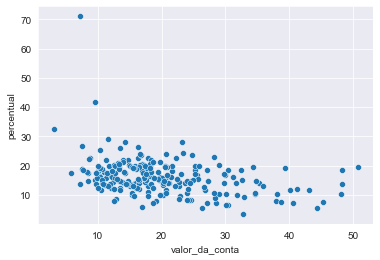

In [310]:
sns.scatterplot(data=gorjetas, x='valor_da_conta', y='percentual')

**Visualmente, o aumento da gorjeta não é proporcional ao aumento do valor da conta**

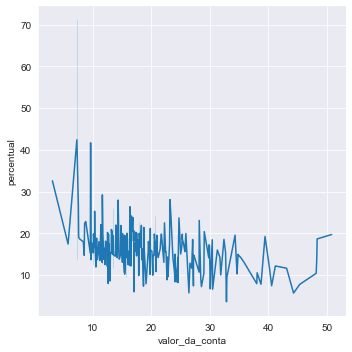

In [311]:
sns.relplot(data=gorjetas,x='valor_da_conta', y='percentual', kind='line')

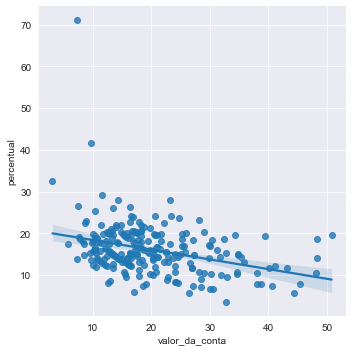

In [312]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='percentual')

## Análise 2

In [313]:
gorjetas.query('sobremesa == "Sim"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,percentual
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,16.319140
std,9.832154,1.401468,0.810751,8.511748
min,3.070000,1.000000,1.000000,3.560000
25%,13.420000,2.000000,2.000000,10.680000
50%,17.920000,3.000000,2.000000,15.380000
75%,26.860000,3.680000,3.000000,19.510000
max,50.810000,10.000000,5.000000,71.030000


In [314]:
gorjetas.query('sobremesa == "Não"').describe()

,valor_da_conta,gorjeta,total_de_pessoas,percentual
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,15.932318
std,8.255582,1.377190,1.017984,3.990701
min,7.250000,1.000000,1.000000,5.680000
25%,13.325000,2.000000,2.000000,13.690000
50%,17.590000,2.740000,2.000000,15.560000
75%,22.755000,3.505000,3.000000,18.500000
max,48.330000,9.000000,6.000000,29.200000


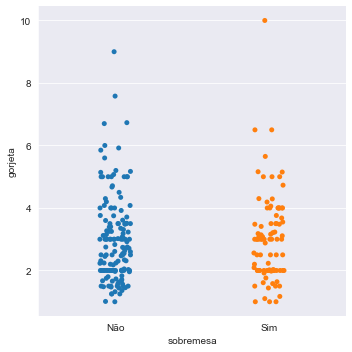

In [315]:
sns.catplot(data=gorjetas, x='sobremesa', y='gorjeta')

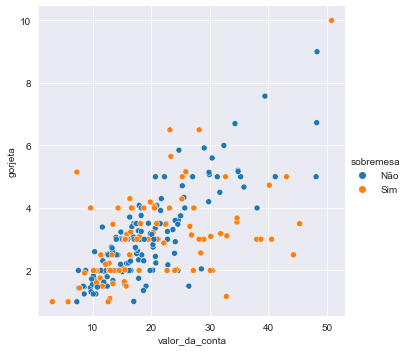

In [316]:
sns.relplot(data=gorjetas,x='valor_da_conta', y='gorjeta', hue='sobremesa')

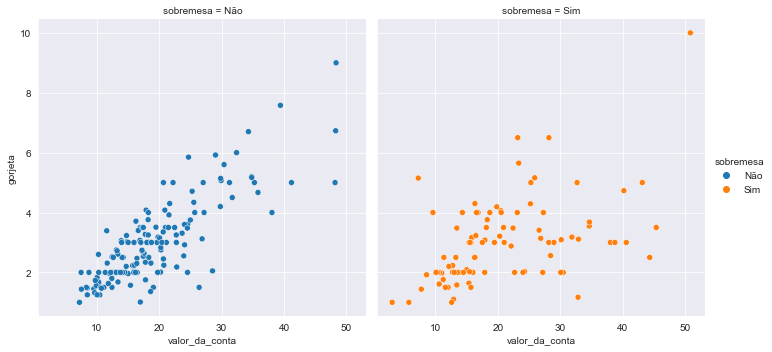

In [317]:
sns.relplot(data=gorjetas,x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa')

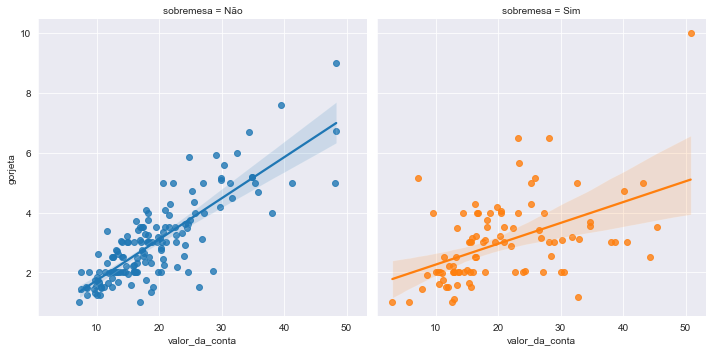

In [318]:
sns.lmplot(data=gorjetas,x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa')

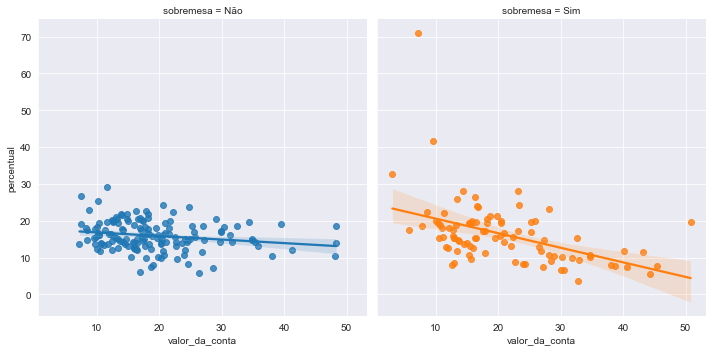

In [319]:
sns.lmplot(data=gorjetas,x='valor_da_conta', y='percentual', hue='sobremesa', col='sobremesa')

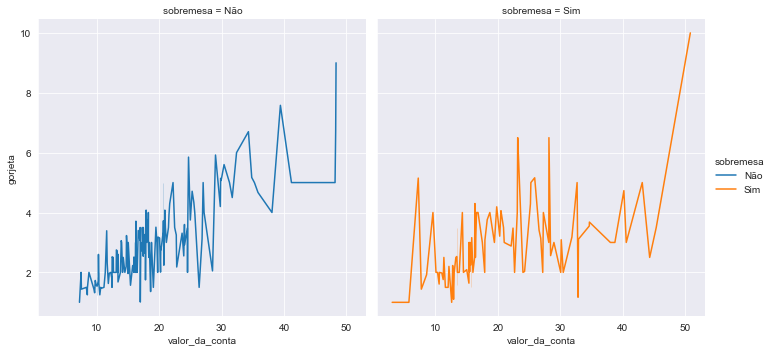

In [320]:
sns.relplot(data=gorjetas,x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line')

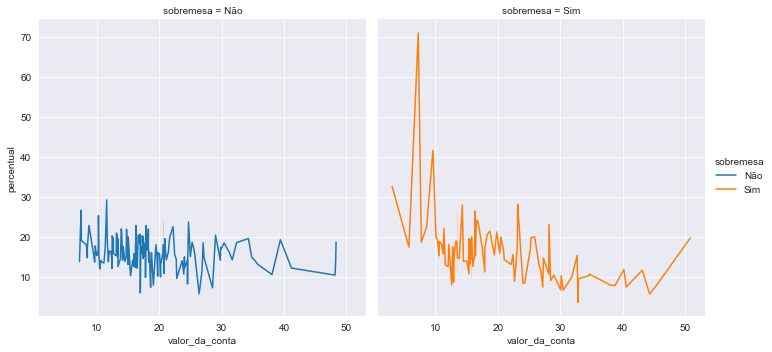

In [321]:
sns.relplot(data=gorjetas,x='valor_da_conta', y='percentual', hue='sobremesa', col='sobremesa', kind='line')

## Teste de Hipotese

H<sup>null</sup> *Distribuição da taxa de gorjeta é a mesma em dois grupos* **Se pvalue <=0.05**

H<sup>alt</sup> *Distribuição da taxa de gorjeta não é a mesma em dois grupos* **Se pvalue > 0.05**

In [322]:
from scipy.stats import ranksums

In [323]:
percentual_sim = gorjetas.query('sobremesa == "Sim"').percentual
percentual_sim.sample(3)

221    25.93
231    19.12
179    10.25
Name: percentual, dtype: float64

In [324]:
percentual_nao = gorjetas.query('sobremesa == "Não"').percentual
percentual_nao.sample(3)

40    13.97
37    18.13
34    18.39
Name: percentual, dtype: float64

In [325]:
ranksums(percentual_sim, percentual_nao)

RanksumsResult(statistic=-0.5845504113520769, pvalue=0.558850059321255)

H<sup>null</sup> Distribuição da taxa de gorjeta é a mesma em dois grupos

## Análise 3 - Dias da Semana

In [326]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,percentual
0,16.99,1.01,Não,Domingo,Jantar,2,5.94
1,10.34,1.66,Não,Domingo,Jantar,3,16.05
2,21.01,3.50,Não,Domingo,Jantar,3,16.66
3,23.68,3.31,Não,Domingo,Jantar,2,13.98
4,24.59,3.61,Não,Domingo,Jantar,4,14.68


In [327]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta-feira', 'Sexta-feira'], dtype=object)

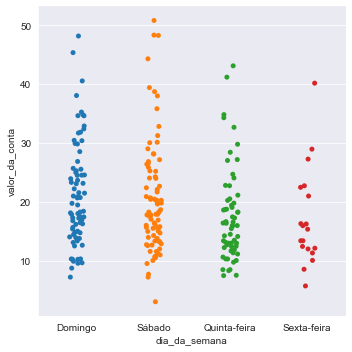

In [328]:
sns.catplot(data=gorjetas, x='dia_da_semana', y='valor_da_conta')

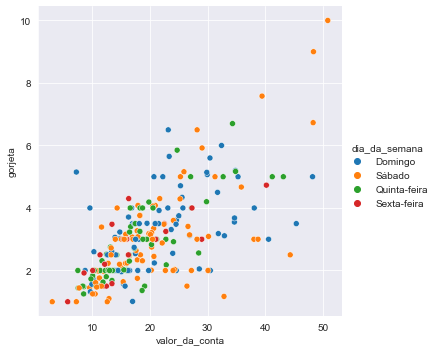

In [329]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='dia_da_semana')

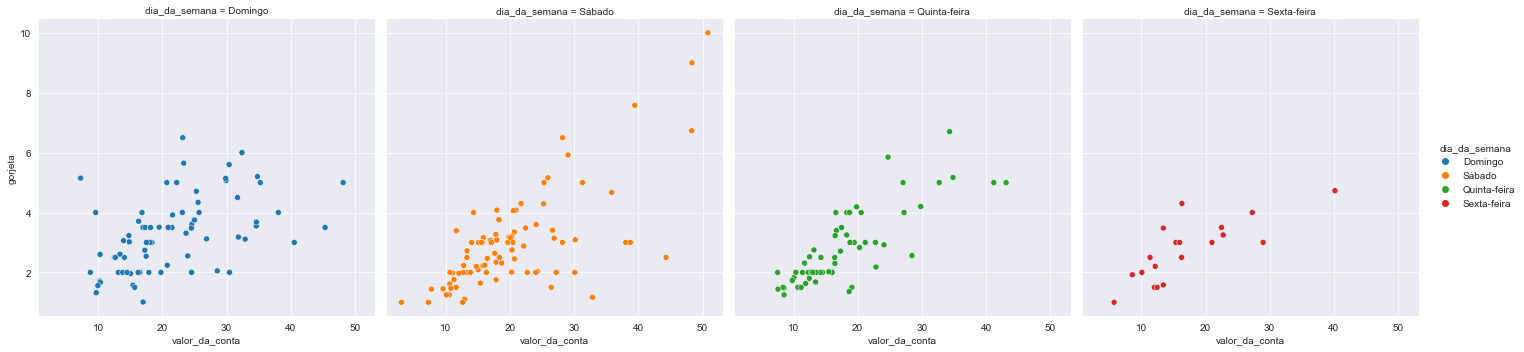

In [330]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana')

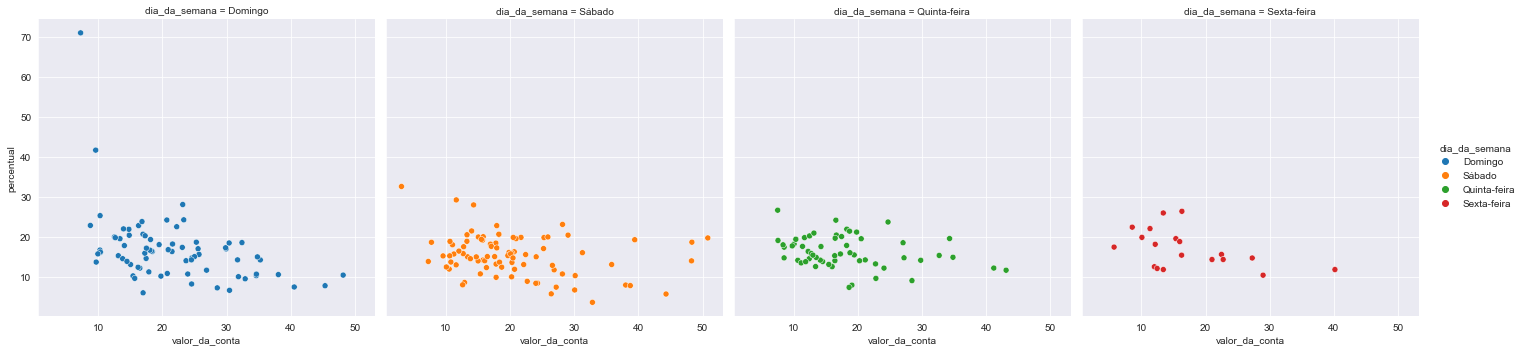

In [331]:
sns.relplot(data=gorjetas, x='valor_da_conta', y='percentual', hue='dia_da_semana', col='dia_da_semana')

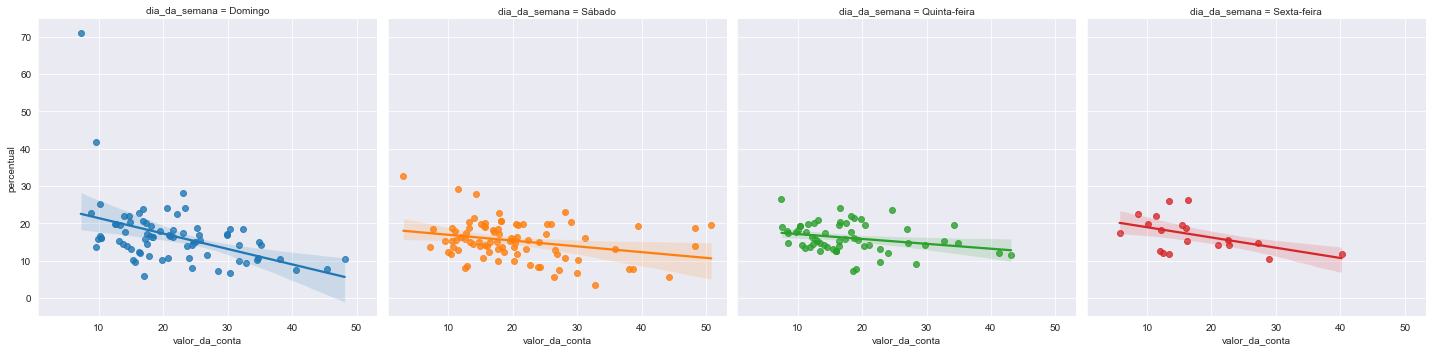

In [332]:
sns.lmplot(data=gorjetas, x='valor_da_conta', y='percentual', hue='dia_da_semana', col='dia_da_semana')

## Análise Descritiva

In [333]:
media_gorjetas = gorjetas.gorjeta.mean()
media_gorjetas

2.9982786885245902

In [334]:
gorjetas.groupby('dia_da_semana').mean()

,valor_da_conta,gorjeta,total_de_pessoas,percentual
dia_da_semana,,,,
Domingo,21.410000,3.255132,2.842105,16.689605
Quinta-feira,17.682742,2.771452,2.451613,16.126452
Sexta-feira,17.151579,2.734737,2.105263,16.991579
Sábado,20.441379,2.993103,2.517241,15.314598


In [335]:
gorjetas.dia_da_semana.value_counts()

Sábado          87
Domingo         76
Quinta-feira    62
Sexta-feira     19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese 2

H<sup>null</sup> *Distribuição do valor da conta é a mesma em dois grupos* **Se pvalue <=0.05**

H<sup>alt</sup> *Distribuição do valor da conta não é a mesma em dois grupos* **Se pvalue > 0.05**

In [338]:
domigo = gorjetas.query('dia_da_semana == "Domingo"').valor_da_conta
domigo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [339]:
sabado = gorjetas.query('dia_da_semana == "Sábado"').valor_da_conta
sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [341]:
ranksums(domigo, sabado)

RanksumsResult(statistic=0.9198084864360142, pvalue=0.3576728477868443)

H<sup>alt</sup> *Distribuição do valor da conta não é a mesma em dois grupos*

## Ultima Análise

In [343]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

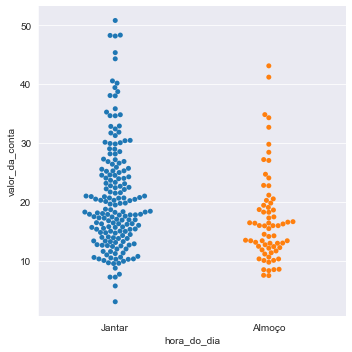

In [345]:
sns.catplot(data=gorjetas, x='hora_do_dia',kind='swarm', y='valor_da_conta')

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

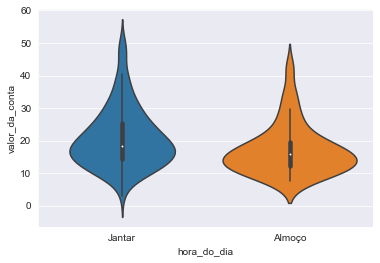

In [346]:
sns.violinplot(data=gorjetas, x='hora_do_dia', y='valor_da_conta')

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

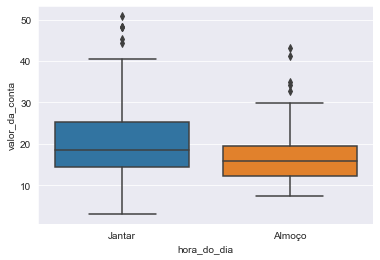

In [348]:
sns.boxplot(data=gorjetas, x='hora_do_dia', y='valor_da_conta')

In [350]:
almoco = gorjetas.query('hora_do_dia == "Almoço"')['valor_da_conta']
almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

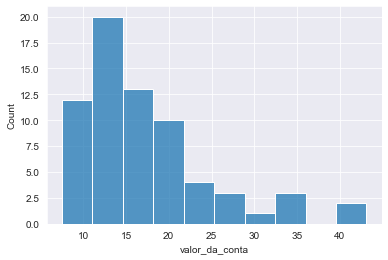

In [351]:
sns.histplot(almoco)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

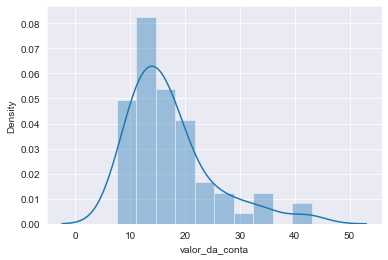

In [354]:
sns.distplot(almoco)

In [355]:
jantar = gorjetas.query('hora_do_dia == "Jantar"')['valor_da_conta']
jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

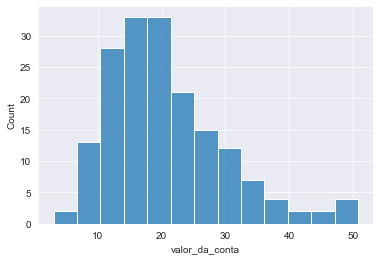

In [356]:
sns.histplot(jantar)

C:\Users\walas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

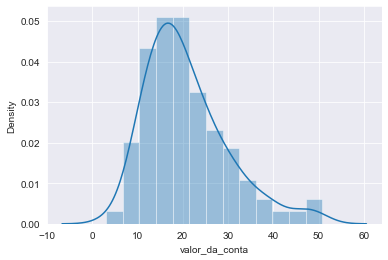

In [357]:
sns.distplot(jantar)

In [361]:
gorjetas.groupby('hora_do_dia').mean()[['valor_da_conta', 'gorjeta', 'percentual']]

,valor_da_conta,gorjeta,percentual
hora_do_dia,,,
Almoço,17.168676,2.728088,16.411765
Jantar,20.797159,3.102670,15.951477


## Teste de Hipostese 3

H<sup>null</sup> *Distribuição do valor da conta é a mesma em dois grupos* **Se pvalue >= 0.05**

H<sup>alt</sup> *Distribuição do valor da conta não é a mesma em dois grupos* **Se pvalue < 0.05**

In [362]:
ranksums(jantar, almoco)

RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)

H<sup>alt</sup> Distribuição do valor da conta não é a mesma em dois

In [364]:
jantar_percentual = gorjetas.query('hora_do_dia == "Jantar"')['percentual']
jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

In [365]:
almoco_percentual = gorjetas.query('hora_do_dia == "Almoço"')['percentual']
almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

In [366]:
ranksums(almoco_percentual, jantar_percentual)

RanksumsResult(statistic=1.204699018193021, pvalue=0.22831951519679017)

H<sup>null</sup> *Distribuição do valor da conta é a mesma em dois grupos*